In [4]:
import numpy as np
import pandas as pd

#dataset = pd.read_csv('pima.csv')
import io
from google.colab import files

In [5]:
uploaded = files.upload()
dataset = pd.read_csv(io.BytesIO(uploaded['pima.csv']))

Saving pima.csv to pima.csv


In [ ]:
dataset.describe()

In [7]:
X = dataset.iloc[:, 0:8]
Y = dataset.iloc[:, 8]

In [8]:
from sklearn.preprocessing import StandardScaler #แปลงข้อข้มูลมู (transform data)

In [9]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

In [13]:
from keras import Sequential
from keras.layers import Dense

In [14]:
classifier = Sequential()

In [16]:
#First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=8))
#Second Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
#output = activation(dot(input, kernel) + bias)

In [17]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Fitting the data to training dataset
#classifier.fit(X_train, Y_train, batch_size=10, epochs=100)
history = classifier.fit(X_train, Y_train, batch_size=10, epochs=100, validation_data=(X_test,Y_test))

In [20]:
#eval_model = classifier.evaluate(X_train, Y_train)
#print(eval_model)
score = classifier.evaluate(X_train, Y_train, verbose = 0)
print('Test loss : ', score[0])
print('Test accuracy : ', score[1])

Test loss :  0.4406847059726715
Test accuracy :  0.7877094745635986


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


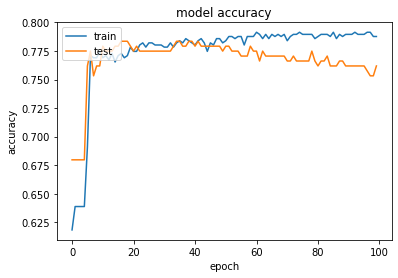

In [21]:
import matplotlib.pyplot as plt # For graphical representation

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
print(history.history.keys())

plt.show()

In [22]:
classifier.save("pima_model.h5")
print("Saved model.")

Saved model.


In [23]:
Y_pred = classifier.predict(X_test)
Y_pred = (Y_pred > 0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[135  22]
 [ 33  41]]


In [24]:
from numpy import loadtxt
from keras.models import load_model

In [25]:
#load model
model = load_model('pima_model.h5')

In [ ]:
#summarize model
model.summary()

In [27]:
uploaded = files.upload()
X_new = udata.iloc[:, 0:8]
predict_x=model.predict(X_new)
print(predict_x)
classes_x=(predict>0.5).astype("int32")
Y_new = model.predict_classes(X_new)
yacc = model.predict(X_new)

Saving pima_unseen.csv to pima_unseen.csv


NameError: ignored

In [ ]:
for i in range(len(Y_new)):
udata = pd.read_csv(io.BytesIO(uploaded['pima_unseen.csv']))

print("The label of unsenn data is ", Y_new[i], '\t', yacc[i])